<a href="https://colab.research.google.com/github/jelee2498/SDS/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/jelee2498/SDS.git

Cloning into 'SDS'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 176 (delta 0), reused 1 (delta 0), pack-reused 168
Receiving objects: 100% (176/176), 247.86 MiB | 39.83 MiB/s, done.
Resolving deltas: 100% (45/45), done.


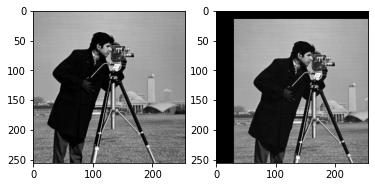

In [15]:

"""
Translation-1
"""

import matplotlib.pyplot as plt
from skimage import io, transform
from scipy import ndimage
import numpy as np


try:  # running in Colab
    image = io.imread('./SDS/Day1/ex1-2_transformation/cameraman.tif')
except FileNotFoundError:  # running in Pycharm
    image = io.imread('./cameraman.tif')

imageTranslated = np.zeros_like(image)

# make transform matrix: x->x+15, y->y+30

# x - vertical axis
# y - horizontal axis
Tx = 15
Ty = 30

T = [[1, 0, Tx],
     [0, 1, Ty],
     [0, 0, 1]]
T_inv = np.linalg.inv(T)


# apply transform

iMax, jMax = np.shape(image)
iTranslated = 0

while iTranslated < iMax:
    jTranslated = 0
    while jTranslated < jMax:
        # find native coordinates using T_inv
        nativeI, nativeJ, _ = np.dot(T_inv, np.transpose([iTranslated,
                                                         jTranslated, 1]))
        # map value of native coordinates to the corresponding imageTranslated coordinates
        # order: the order of the spline interpolation
        imageTranslated[iTranslated, jTranslated] = ndimage.map_coordinates(image,
                                                    [[nativeI], [nativeJ]], order=1)
        jTranslated += 1
    iTranslated += 1

# check result

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(imageTranslated, cmap='gray')
plt.show()



Transformation matrix
[[  1.  -0. -15.]
 [  0.   1. -30.]
 [  0.   0.   1.]]


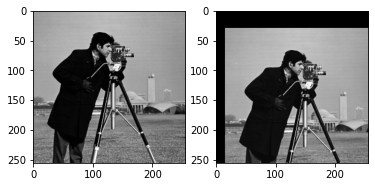

In [16]:

"""
Translation-2
"""

import matplotlib.pyplot as plt
from skimage import io, transform
from scipy import ndimage
import numpy


try:  # running in Colab
    image = io.imread('./SDS/Day1/ex1-2_transformation/cameraman.tif')
except FileNotFoundError:  # running in Pycharm
    image = io.imread('./cameraman.tif')

Tx = 15
Ty = 30

# make transform matrix: x->x+15, y->y+30

# translation_x - ? axis
# translation_y - ? axis
tform_inv = transform.AffineTransform(translation=[-Tx, -Ty])
print('')
print('Transformation matrix')
print(tform_inv.params)

# apply transform

# skimage.transform.warp(image, inverse_map)
# inverse_map: inverse coordinate map, which transforms coordinates in the ouput images into
# their corresponding coordinates in the input image
imageTranslated = transform.warp(image, tform_inv)

# check result

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(imageTranslated, cmap='gray')
plt.show()


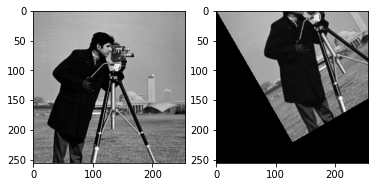

In [17]:

"""
Rotation - 1
"""

import matplotlib.pyplot as plt
from skimage import io, transform
import scipy
from scipy import ndimage
import numpy as np
import math


try:  # running in Colab
    image = io.imread('./SDS/Day1/ex1-2_transformation/cameraman.tif')
except FileNotFoundError:  # running in Pycharm
    image = io.imread('./cameraman.tif')

imageRotated = np.zeros_like(image)

# make transformation matrix: 30 degree

Theta = math.radians(30)
T = [[math.cos(Theta), -math.sin(Theta), 0],
     [math.sin(Theta), math.cos(Theta), 0],
     [0, 0, 1]]
T_inv = np.linalg.inv(T)


# apply transform

iMax, jMax = np.shape(image)
iRotated = 0

while iRotated < iMax:
    jRotated = 0
    while jRotated < jMax:
        # find native coordinates using T_inv
        nativeI, nativeJ, _ = np.dot(T_inv, np.transpose([iRotated,
                                                         jRotated, 1]))
        # map value of native coordinates to the corresponding imageTranslated coordinates
        # order: the order of the spline interpolation
        imageRotated[iRotated, jRotated] = ndimage.map_coordinates(image,
                                                    [[nativeI], [nativeJ]], order=1)
        jRotated += 1
    iRotated += 1

# check result

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(imageRotated, cmap='gray')
plt.show()


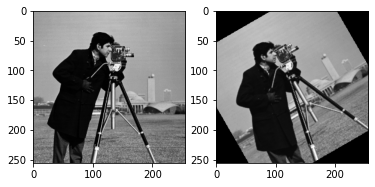

In [18]:

"""
Rotation - 2
"""

import matplotlib.pyplot as plt
from skimage import io, transform
import scipy
from scipy import ndimage
import numpy as np
import math
from functools import reduce


try:  # running in Colab
    image = io.imread('./SDS/Day1/ex1-2_transformation/cameraman.tif')
except FileNotFoundError:  # running in Pycharm
    image = io.imread('./cameraman.tif')

imageTransformed = np.zeros_like(image)

# make transformation matrix: translation -> rotation -> translation

iMax, jMax = np.shape(image)

# translate so that center of image to be origin
Tx = - (iMax - 1) / 2
Ty = - (jMax - 1) / 2
Translation = [[1, 0, Tx],
               [0, 1, Ty],
               [0, 0, 1]]

Theta = math.radians(30)
Rotation = [[math.cos(Theta), -math.sin(Theta), 0],
            [math.sin(Theta), math.cos(Theta), 0],
            [0, 0, 1]]

T = reduce(np.dot, [np.linalg.inv(Translation), Rotation, Translation])
T_inv = np.linalg.inv(T)

# apply transform

iTransformed = 0

while iTransformed < iMax:
    jTransformed = 0
    while jTransformed < jMax:
        # find native coordinates using T_inv
        nativeI, nativeJ, _ = np.dot(T_inv, np.transpose([iTransformed,
                                                         jTransformed, 1]))
        # map value of native coordinates to the corresponding imageTranslated coordinates
        # order: the order of the spline interpolation
        imageTransformed[iTransformed, jTransformed] = ndimage.map_coordinates(image,
                                                    [[nativeI], [nativeJ]], order=1)
        jTransformed += 1
    iTransformed += 1

# check result

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(imageTransformed, cmap='gray')
plt.show()


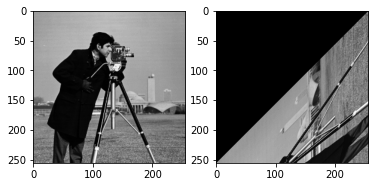

In [19]:

"""
Example - solution
"""

import matplotlib.pyplot as plt
from skimage import io, transform
import scipy
from scipy import ndimage
import numpy as np
import math
from functools import reduce


try:  # running in Colab
    image = io.imread('./SDS/Day1/ex1-2_transformation/cameraman.tif')
except FileNotFoundError:  # running in Pycharm
    image = io.imread('./cameraman.tif')

imageTransformed = np.zeros_like(image)

# make transformation matrix

iMax, jMax = np.shape(image)

Tx = 2 * (iMax - 1)
Ty = 0
Translation = [[1, 0, Tx],
               [0, 1, Ty],
               [0, 0, 1]]

Theta = math.radians(90)
Rotation = [[math.cos(Theta), -math.sin(Theta), 0],
            [math.sin(Theta), math.cos(Theta), 0],
            [0, 0, 1]]

Shx = 0
Shy = 1
Shear = [[1, Shx, 0],
         [Shy, 1, 0],
         [0, 0, 1]]

T = reduce(np.dot, [Translation, Rotation, Shear])
T_inv = np.linalg.inv(T)

# apply transform

iTransformed = 0

while iTransformed < iMax:
    jTransformed = 0
    while jTransformed < jMax:
        # find native coordinates using T_inv
        nativeI, nativeJ, _ = np.dot(T_inv, np.transpose([iTransformed,
                                                         jTransformed, 1]))
        # map value of native coordinates to the corresponding imageTranslated coordinates
        # order: the order of the spline interpolation
        imageTransformed[iTransformed, jTransformed] = ndimage.map_coordinates(image,
                                                    [[nativeI], [nativeJ]], order=1)
        jTransformed += 1
    iTransformed += 1

# check result

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(imageTransformed, cmap='gray')
plt.show()